<a href="https://colab.research.google.com/github/Tantatorn-dev/boku-no-notebooks/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster
This is a competition from [Kaggle](https://www.kaggle.com/c/titanic).

## Get the data
Download dataset from Kaggle

In [ ]:
# config environment
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [1]:
%cd /content/drive/My Drive/Kaggle/titanic

/content/drive/My Drive/Kaggle/titanic


In [ ]:
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# list all files
!ls

gender_submission.csv  out.csv	test.csv  train.csv


## Exploratory Data Analysis
Let's get some insight from data!

In [3]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# check all columns
list(data.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### Comparison of Survivability by Ticket Classes

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


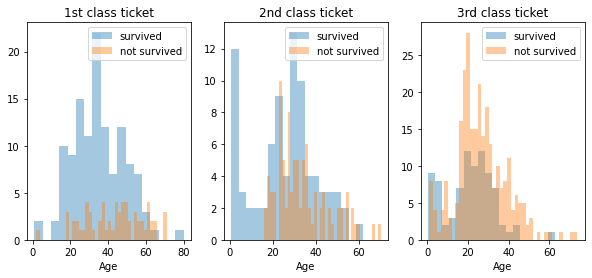

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))

first_class = data[data['Pclass']==1]
second_class = data[data['Pclass']==2]
third_class = data[data['Pclass']==3]

ax = sns.distplot(first_class[first_class['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(first_class[first_class['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('1st class ticket')

ax = sns.distplot(second_class[second_class['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(second_class[second_class['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('2nd class ticket')

ax = sns.distplot(third_class[third_class['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[2], kde = False)
ax = sns.distplot(third_class[third_class['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[2], kde = False)
ax.legend()
_ = ax.set_title('3rd class ticket')


You'll see that 1st class ticket passengers have more chance to survive.

### Comparison of survivability by sex

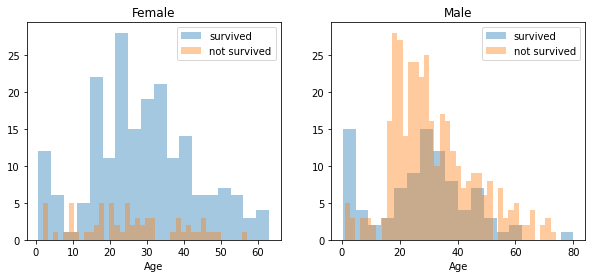

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = data[data['Sex']=='female']
men  = data[data['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)

ax.legend()
_ = ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Female is more likely to survive than male
### Let's find some connection between SibSp and Parch

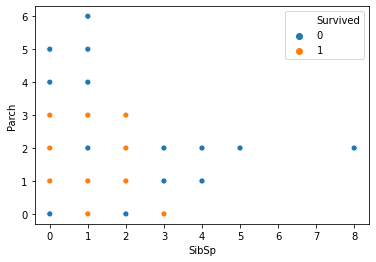

In [7]:
sns.scatterplot(data['SibSp'],data['Parch'],hue=data['Survived'])

### Comparison of survivability by Fare

Text(0, 0.5, 'Frequency')

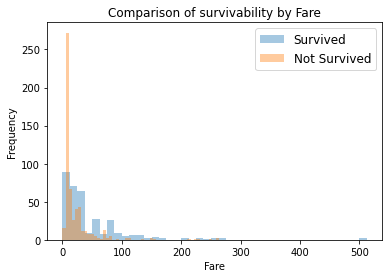

In [ ]:
# let's create a histogram
survived = data[data['Survived'] == 1]
sns.distplot(survived['Fare'],  kde=False, label='Survived')

not_survived = data[data['Survived'] == 0]
sns.distplot(not_survived['Fare'],  kde=False, label='Not Survived')

plt.legend(prop={'size': 12})
plt.title('Comparison of survivability by Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

### Comparison of survivability by Embarked city

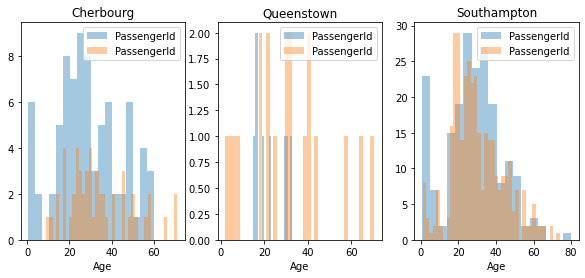

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))

cherbourg = data[data['Embarked']=='C']
queenstown = data[data['Embarked']=='Q']
southampton = data[data['Embarked']=='S']

ax = sns.distplot(cherbourg[cherbourg['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(cherbourg[cherbourg['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
_ = ax.set_title('Cherbourg')

ax = sns.distplot(queenstown[queenstown['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(queenstown[queenstown['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Queenstown')

ax = sns.distplot(southampton[southampton['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[2], kde = False)
ax = sns.distplot(southampton[southampton['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[2], kde = False)
ax.legend()
_ = ax.set_title('Southampton')

I think we've enough insights from data. Let's create some model.

## Data Preparation
let's prepare our data before training

In [ ]:
# check na columns
print("Check na columns")
for i in ['Age','Sex','Pclass','SibSp','Parch','Fare','Survived','Embarked']:
  print(i , ":" , data[i].isna().sum())

Check na columns
Age : 177
Sex : 0
Pclass : 0
SibSp : 0
Parch : 0
Fare : 0
Survived : 0
Embarked : 2


In [ ]:
# let's perform an imputation on age column
data['Age'].fillna(data['Age'].mean(), inplace=True) 

# let's perform an imputation on embarked column
data['Embarked'].fillna('C',inplace=True)

In [ ]:
data['Age'].mean()

29.699117647058763

In [ ]:
X = data[['Age','Sex','Pclass','SibSp','Parch','Fare','Survived','Embarked']]
X.head()

,Age,Sex,Pclass,SibSp,Parch,Fare,Survived,Embarked
0,22.0,male,3,1,0,7.2500,0,S
1,38.0,female,1,1,0,71.2833,1,C
2,26.0,female,3,0,0,7.9250,1,S
3,35.0,female,1,1,0,53.1000,1,S
4,35.0,male,3,0,0,8.0500,0,S


In [ ]:
# encode the sex column
encoded_sex = pd.get_dummies(X['Sex'])
encoded_Pclass = pd.get_dummies(X['Pclass'])
encoded_embarked = pd.get_dummies(X['Embarked'])

# drop old columns
X = X.drop(columns=['Sex','Pclass','Embarked'])

# join new columns
X = X.join([encoded_sex,encoded_Pclass,encoded_embarked])
X.head()

,Age,SibSp,Parch,Fare,Survived,female,male,1,2,3,C,Q,S
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,1,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,1,1,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,1,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1


In [ ]:
# seperate survived column
y = X['Survived']
X = X.drop(columns=['Survived'])

In [ ]:
# check shape 
print("X shape: ",X.shape)
print("y shape: ",y.shape)

X shape:  (891, 12)
y shape:  (891,)


In [ ]:
# split data in train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

## Model
Let's create a prediction model.

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(12,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(X_test.shape)
print(y_test.shape)

(179, 12)
(179,)


In [ ]:
history = model.fit(X_train, y_train, epochs=1000,
                    verbose = 0, 
                    validation_data=(X_test,y_test))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



# Evaluation
Let's see our model works well on test data

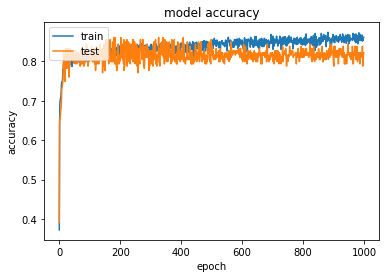

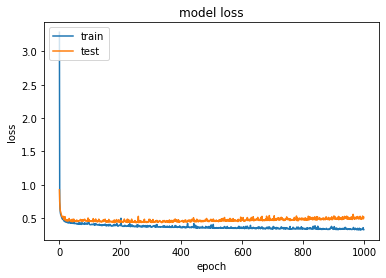

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Validation
Let's validate with test file

In [ ]:
# load test file
validate_data = pd.read_csv('test.csv')
validate_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# let's perform an imputation on age column
validate_data['Age'].fillna(data['Age'].mean(), inplace=True) 
validate_data['Embarked'].fillna('C', inplace=True) 

In [ ]:
# preprocess validate data
X = validate_data[['Age','Sex','Pclass','SibSp','Parch','Fare','Embarked']]

In [ ]:
# encode the sex column
encoded_sex = pd.get_dummies(X['Sex'])
encoded_Pclass = pd.get_dummies(X['Pclass'])
encoded_embarked = pd.get_dummies(X['Embarked'])

# drop old columns
X = X.drop(columns=['Sex','Pclass','Embarked'])

# join new columns
X = X.join([encoded_sex,encoded_Pclass,encoded_embarked])
X.head()

,Age,SibSp,Parch,Fare,female,male,1,2,3,C,Q,S
0,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


In [ ]:
# check shape
print(X.shape)

(418, 12)


In [ ]:
prediction = model.predict(X)
prediction

array([[2.68611908e-02],
       [2.10259974e-01],
       [3.72052193e-04],
       [7.87139237e-02],
       [5.65798163e-01],
       [1.65231675e-01],
       [6.46112382e-01],
       [2.03081667e-01],
       [7.49189615e-01],
       [9.06011164e-02],
       [6.60390258e-02],
       [2.13169187e-01],
       [8.66101265e-01],
       [2.49207020e-02],
       [8.02257478e-01],
       [8.66284609e-01],
       [2.03160286e-01],
       [1.42920464e-01],
       [4.92633045e-01],
       [4.69608009e-02],
       [2.60077894e-01],
       [1.66820228e-01],
       [9.20489669e-01],
       [6.06086314e-01],
       [6.90404534e-01],
       [1.73276961e-02],
       [9.44975734e-01],
       [1.31620646e-01],
       [2.92096674e-01],
       [7.51520991e-02],
       [5.52273691e-02],
       [2.13025510e-01],
       [4.08558309e-01],
       [4.76424396e-01],
       [4.44208056e-01],
       [1.63550466e-01],
       [5.12208223e-01],
       [6.49402618e-01],
       [9.00035203e-02],
       [1.76215053e-01],


In [ ]:
# turn prediction to dataframe
result = pd.DataFrame(validate_data['PassengerId'])
prediction_series = pd.Series(prediction[:,0])
result = result.join([prediction_series])
result = result.rename(columns={0:'Survived'})
result

,PassengerId,Survived
0,892,0.026861
1,893,0.210260
2,894,0.000372
3,895,0.078714
4,896,0.565798
...,...,...
413,1305,0.066256
414,1306,0.914446
415,1307,0.038273
416,1308,0.066256


In [ ]:
# turn prob into 0 or 1
def prob_to_binary(p):
  if p=='nan':
    return 0
  if p>=.5:
    return 1
  else:
    return 0

result['Survived'] = result['Survived'].apply([prob_to_binary])
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
result.to_csv('out.csv',index=False)